## 基礎題 - 算出斜率w與截距b

y = wx + b

記得計算前X須符合資料格式
$$[x_1, x_2, \ldots, x_{50}]$$

==> 

$$[[x_1], [x_2], \ldots, [x_{50}]]$$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [10]:
x = np.array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])
y = np.array([ 0.85848224, -0.10657947,  1.42771901,  0.53554778,  1.20216826,
        1.81330509,  1.88362644,  2.23557653,  2.7384889 ,  3.41174583,
        4.08573636,  3.82529502,  4.39723111,  4.8852381 ,  4.70092778,
        4.66993962,  6.05133235,  5.44529881,  7.22571332,  6.79423911,
        7.05424438,  7.00413058,  7.98149596,  7.00044008,  7.95903855,
        9.96125238,  9.06040794,  9.56018295,  9.30035956,  9.26517614,
        9.56401824, 10.07659844, 11.56755942, 11.38956185, 11.83586027,
       12.45642786, 11.58403954, 11.60186428, 13.88486667, 13.35550112,
       13.93938726, 13.31678277, 13.69551472, 14.76548676, 14.81731598,
       14.9659187 , 15.19213921, 15.28195017, 15.97997265, 16.41258817])

斜率=1.6170185212611565;截距=0.27312968949421723
誤差=0.26267606969489105


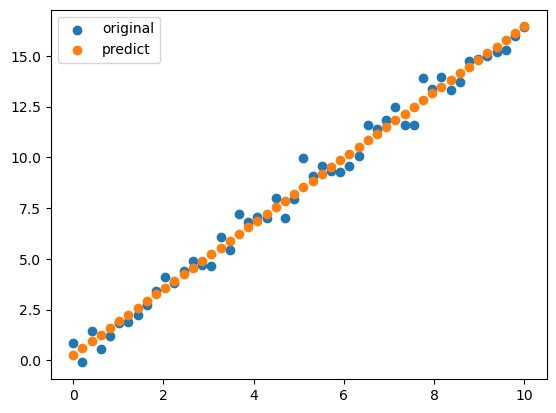

In [19]:
#匯入在sklearn.linear_model套件裡面的LinearRegression模型
#將模型工具指派給一變數做使用
#注意轉換x得格式1D->2D
#將x,y資料導入LinearRegression演算法做訓練
#列印出訓練完成之函數的斜率與截距
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

x = x.reshape(-1,1)
x.shape
regr.fit(x,y)
Y = regr.predict(x)
regr.get_params()

W=regr.coef_
b=regr.intercept_

print('斜率='+str(W[0])+';截距='+str(b))

#calculate mse
mse = np.sum((Y-y)**2) / len(y)
print('誤差='+str(mse))

plt.scatter(x,y,label='original')
plt.scatter(x,Y,label='predict')
plt.legend()

## 進階題 - 切割資料集分別做訓練與預測(訓練資料80%、測試資料20%)


In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])
y = np.array([ 0.85848224, -0.10657947,  1.42771901,  0.53554778,  1.20216826,
        1.81330509,  1.88362644,  2.23557653,  2.7384889 ,  3.41174583,
        4.08573636,  3.82529502,  4.39723111,  4.8852381 ,  4.70092778,
        4.66993962,  6.05133235,  5.44529881,  7.22571332,  6.79423911,
        7.05424438,  7.00413058,  7.98149596,  7.00044008,  7.95903855,
        9.96125238,  9.06040794,  9.56018295,  9.30035956,  9.26517614,
        9.56401824, 10.07659844, 11.56755942, 11.38956185, 11.83586027,
       12.45642786, 11.58403954, 11.60186428, 13.88486667, 13.35550112,
       13.93938726, 13.31678277, 13.69551472, 14.76548676, 14.81731598,
       14.9659187 , 15.19213921, 15.28195017, 15.97997265, 16.41258817])


切分前長度為(50,)
切分後訓練集長度為(40,)


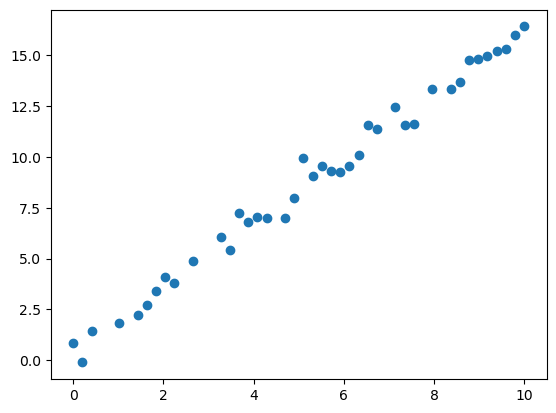

In [26]:
#匯入在sklearn.linear_model套件裡面的LinearRegression模型
#匯入在sklearn.model_selection套件裡面的train_test_split模組
#切割數據集(訓練資料80%、測試資料20%，設定random_state=20)
#畫出訓練資料集的matplotlib圖形m
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print('切分前長度為'+str(x.shape))
print('切分後訓練集長度為'+str(x_train.shape))
plt.scatter(x_train,y_train)

## 用訓練資料來 fit 函數
1. 只用訓練資料集的資料進行linear regression演算法<br>
2. 並計算出訓練階段的MSE
3. 畫出目標點(藍色)與預測點(紅色)的對應圖
![](images/LR_train.PNG)

In [27]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

x_train = x_train.reshape(-1,1)
x_train.shape
regr.fit(x_train,y_train)
Y_train = regr.predict(x_train)
regr.get_params()

W=regr.coef_
b=regr.intercept_

print('斜率='+str(W[0])+';截距='+str(b))

#calculate mse
mse = np.sum((Y_train-y_train)**2) / len(y)
print('訓練集誤差為'+str(mse))


斜率=1.5817904475722409;截距=0.4530388662784919
訓練集誤差為0.19668067834200606


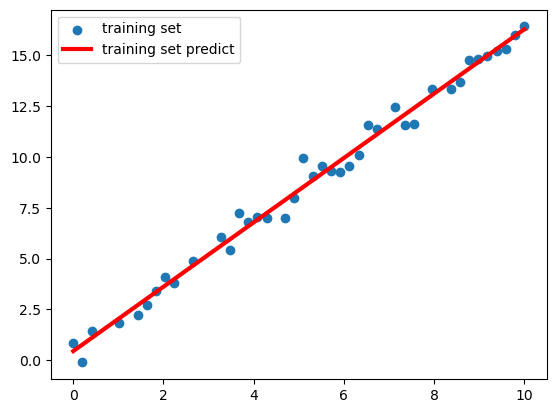

In [33]:
plt.scatter(x_train,y_train,label='training set')
x_plot=np.linspace(0,10,1000)
plt.plot(x_plot,x_plot*W+b,'r',linewidth='3',label='training set predict')
plt.legend()

## 將訓練出來的函數預測測試集的X值
1. 使用剛剛訓練出來的模型進行測試資料集的資料預測*注意reshape<br>
使用X = 2.44897959，預測出來數值應該為 4.3025375<br>
所有測試集資料
$$\widehat{y}=xw+b=w_{1}x_{1}+b$$

In [40]:
x_test=x_test.reshape(-1,1)
Y_test=regr.predict(x_test)
Y_test

array([ 7.55495516,  5.29525452,  4.32681139, 12.71998519,  1.74429637,
        4.97244015, 11.42872769,  1.421482  ,  2.38992514, 13.36561395])

In [37]:
#calculate mse
mse = np.sum((Y_test-y_test)**2) / len(y)
print('測試集誤差為'+str(mse))

測試集誤差為0.0767735197518196


2. 並計算出測試階段的MSE

Text(0.5, 1.0, 'f(x)=1.5817904475722409x+0.4530388662784919,mse:0.0767735197518196')

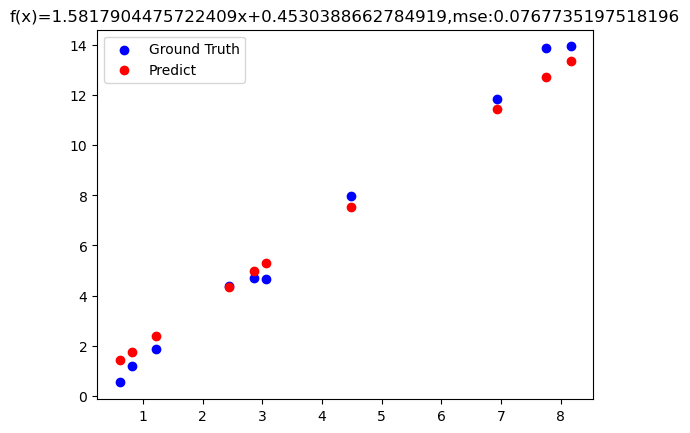

In [46]:
plt.scatter(x_test,y_test,label='Ground Truth',c='b')
plt.scatter(x_test,Y_test,label='Predict',c='r')
plt.legend()
plt.title('f(x)='+str(W[0])+'x+'+str(b)+',mse:'+str(mse))

3. 畫出目標點(藍色)與預測點(紅色)的對應圖
![](images/LR_test.PNG)